In [1]:
# Import dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np

# Import and read the healthcare-dataset-stroke-data.csv.
import pandas as pd 
stroke_df = pd.read_csv("data/healthcare-dataset-stroke-data.csv")
stroke_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## **EDA & Preprocessing**


In [2]:
# Examine the info for the dataframe
stroke_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [3]:
# Examine the total NaN values for each column
stroke_df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [4]:
# Create a series of average BMI for each age
avg_bmi_by_age = stroke_df.groupby('age')['bmi'].mean()
avg_bmi_by_age

age
0.08     15.500000
0.16     14.766667
0.24     17.400000
0.32     18.080000
0.40     15.850000
           ...    
78.00    27.929032
79.00    27.862338
80.00    28.783582
81.00    27.951667
82.00    28.029091
Name: bmi, Length: 104, dtype: float64

In [5]:
# Replace NaN values in the "bmi" column with the average BMI of the corresponding age
def replace_bmi(row):
    if pd.isna(row['bmi']):
        return avg_bmi_by_age[row['age']]
    else:
        return row['bmi']

stroke_df['bmi'] = stroke_df.apply(replace_bmi, axis=1)

In [6]:
# Check the info of the dataframe (if the NaN values in the 'bmi' column are replaced)
stroke_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [7]:
# Determine the number of unique values in each column.
stroke_df.nunique()

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   487
smoking_status          4
stroke                  2
dtype: int64

In [8]:
# Drop the non-beneficial ID columns
stroke_df = stroke_df.drop(columns = ['id'])

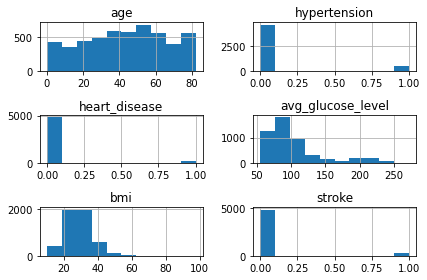

In [9]:
# Examine Data Distribution on numerical columns
stroke_df.hist()
plt.tight_layout()

In [10]:
# Look at gender value counts
gender_counts = stroke_df['gender'].value_counts()
gender_counts

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [11]:
# Drop the record with gender = 'Other' (since there is only 1 record)
stroke_df = stroke_df.drop(stroke_df[stroke_df['gender'] == 'Other'].index)

In [12]:
# Check if 'Other' is dropped on gender column
stroke_df['gender'].unique()

array(['Male', 'Female'], dtype=object)

Text(0.5, 1.0, 'Gender Distribution')

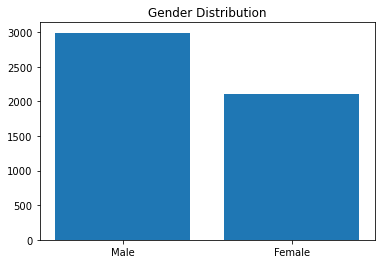

In [13]:
# Examine the distribution of gender column
plt.bar(stroke_df['gender'].unique(), stroke_df['gender'].value_counts())
plt.title('Gender Distribution')

In [14]:
# Look at work type value counts
work_counts = stroke_df['work_type'].value_counts()
work_counts

Private          2924
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

Text(0.5, 1.0, 'Work Type Distribution')

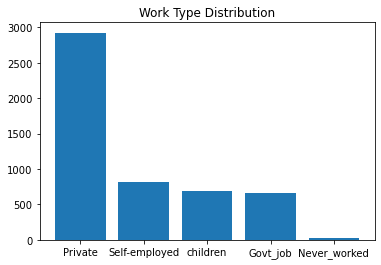

In [15]:
# Examine the distribution of work type column
plt.bar(work_counts.index, work_counts)
plt.title('Work Type Distribution')

In [16]:
# Look at smoking status value counts
smoke_counts = stroke_df['smoking_status'].value_counts()
smoke_counts

never smoked       1892
Unknown            1544
formerly smoked     884
smokes              789
Name: smoking_status, dtype: int64

Text(0.5, 1.0, 'Smoking Status Distribution')

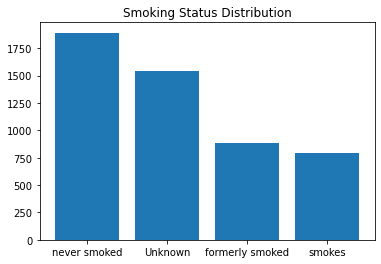

In [17]:
# Examine the distribution of smoking status column
plt.bar(smoke_counts.index, smoke_counts)
plt.title('Smoking Status Distribution')

In [18]:
# Look at the stroke outcome value counts
stroke_counts = stroke_df['stroke'].value_counts()
stroke_counts

0    4860
1     249
Name: stroke, dtype: int64

Text(0.5, 1.0, 'Stroke Outcome Distribution')

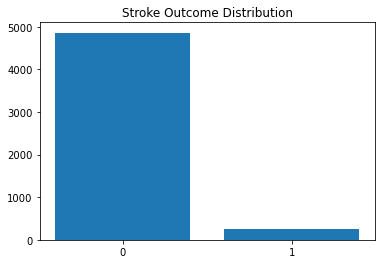

In [19]:
# Examine the distribution of stroke column
plt.bar(x = stroke_counts.index, height = stroke_counts, tick_label = ['0', '1'])
plt.title('Stroke Outcome Distribution')

**Findings:** The `0`s and `1`s in stroke column is highly imbalanced

In [20]:
# Split the data into X and y
y = stroke_df['stroke']
X = stroke_df.drop(columns=['stroke'])

In [21]:
# Import RandomOverSampler
from imblearn.over_sampling import RandomOverSampler

In [22]:
# Perform oversampling with RandomOverSampler
ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(X, y)

In [23]:
# Convert categorical data to numeric with `pd.get_dummies` (only on X, bc y is already 0s and 1s)
X_encoded = pd.get_dummies(X_ros)

In [24]:
# Create a StandardScaler instance
scaler = StandardScaler(with_mean=False)

# Fit the StandardScaler
X_scaler = scaler.fit(X_encoded)

In [25]:
# Split the processed data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_ros, test_size = 0.2, random_state=1)

## **Train and Evaluate the Model**

### **Train model on resampled data using `RandomOverSampler`**

In [26]:
# Dependencies
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, r2_score

In [27]:
# Instantiate a Random Forest Classifier model
rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=1)

In [28]:
# Fit the model with training data
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=1)

In [29]:
# Make predictions on the test set
predictions = rf_model.predict(X_test)

In [30]:
# Evaluate the model with Confusion Matrix and accuracy score
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

acc_score = accuracy_score(y_test, predictions)

In [31]:
# Generate a confusion matrix for the model
display(cm_df)

,Predicted 0,Predicted 1
Actual 0,955,17
Actual 1,0,972


In [32]:
# Look at the accuracy score 
print(f"Accuracy Score : {acc_score}")

Accuracy Score : 0.9912551440329218


In [33]:
# Look at the classification report
print("Classification Report")
print(classification_report(y_test, predictions))

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       972
           1       0.98      1.00      0.99       972

    accuracy                           0.99      1944
   macro avg       0.99      0.99      0.99      1944
weighted avg       0.99      0.99      0.99      1944



**Evaluation:** We have accomplished an high overall accuracy rate of approximately 99.1% when predicting both class `0` and `1` using this model. Our next attempt involves exploring alternative preprocessing techniques, such as binning and various resampling methods, to enhance the sensitivity and specificity scores.

***Note:** After comparing the overall accuracy score, false positive rate and false negative rate, we've decided this is the best model(our final model!).

In [35]:
# For the front end
import pickle
with open('model/model.pkl','wb') as f:
  pickle.dump(rf_model,f)